# **Topic: Introduction to Classification and Other ML Topics**

**Content Creator(s):** Enoch Nunekpeku

**Content Reviewer(s):** Salomey Osei 



# **Content**

1. [Building Machine Learning Model for Predicting Employee Turnover](#turnover)


2. [Data Exploration](#exploring_data)

  - 2.1 [Data Visualization](#visaulization)


3. [Feature Engineering](#feature_engineering)


4. [Encoding](#encoding)


5. [Feature Selection](#feature_selection)





---
<a name="turnover"></a>
# **Building Machine Learning Model for Predicting Employee Turnover**

As a machine learning specialist, you have been hired by a large corporation to help them analyze their employee data in order to better understand their workforce and make informed decisions related to employee retention, productivity, and engagement. 
The company has provided you with a dataset containing information on employee Education, JoiningYear, City, PaymentTier, Age, Gender, EverBenched, ExperienceInCurrentDomain, and LeaveOrNot. 

**The employee dataset includes the following features:**<br><br>
**• Education:** The level of education attained by the employee (e.g., high school, bachelor's degree, master's degree, etc.). 
<br>**• JoiningYear:** The year in which the employee joined the company. 
<br>**• City:** The city in which the employee is based. 
<br>**• PaymentTier:** The payment tier or salary bracket for the employee (e.g., entry-level, mid-level, senior-level, etc.). 
<br>**• Age:** The age of the employee. 
<br>**• Gender:** The gender of the employee. 
<br>**• EverBenched:** A binary indicator of whether the employee has ever been benched (i.e., temporarily removed from a project or assignment). 
<br>**• ExperienceInCurrentDomain:** The number of years of experience the employee has in their current field or domain. 
<br>**• LeaveOrNot:** A binary indicator of whether the employee has left the company. Your goal is to develop a machine learning model using logistic regression that can accurately predict whether an employee will leave or not (employee turnover) and identify the key drivers of employee engagement and productivity.<br>

**The goal of the machine learning project is to develop a logistic regression model** that can accurately predict whether an employee will leave the company or not based on the other variables in the dataset. In addition to developing the model, exploratory data analysis, data processing, data preprocessing, feature engineering and selection, modeling, and model optimization will be performed.

Therefore, in addition to developing the logistic regression model, you should also conduct exploratory data analysis to identify any patterns or trends in the data that may not be immediately apparent. You should use visualizations and statistical techniques to highlight important relationships and correlations in the data, and use this information to inform your model-building process.

Finally, perform model selection using cross-validation to determine which of the models (SVM, Random Forest, Gradient Boosting, & KNN) performs best. 

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Extracting Data

employee_df =  pd.read_csv('https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/employee.csv')
employee_df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [ ]:
employee_df.shape

(4653, 9)

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
# you can also use the method .dtypes to check the data types of each column

print(employee_df.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


NB: We can see that some columns have 'object' data types, which should <br>be converted to the appropriate data types for better processing and analysis. 

The .astype() method is used to convert the data type of a pandas Series or DataFrame column to a specified data type.<br>
It is important because machine learning algorithms typically require the data to be in a specific data type to work properly.<br> For example, if the data in a column is in string format, it may need to be converted to a numerical format before it can<br>be used in a machine learning algorithm.

<br> For this particular data, we can observe that 'Education', 'City', 'Gender', and 'EverBenched' have the categorical data types<br> so we are going to change their datatypes from object to category.

In [ ]:
# Convert the data types of the columns in the employee_df to the right data types

# Convert 'Education', 'City', 'Gender', and 'EverBenched' to categorical data types
employee_df['Education'] = employee_df['Education'].astype('category')
employee_df['City'] = employee_df['City'].astype('category')
employee_df['Gender'] = employee_df['Gender'].astype('category')
employee_df['EverBenched'] = employee_df['EverBenched'].astype('category')

# You can then view the updated data types using the following code:
print(employee_df.dtypes)

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object


In [ ]:
# .isnull() Generates a boolean mask indicating which values are missing or null. 

employee_df.isnull().head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


The .isnull().sum() method is used to calculate the number of missing values in a pandas DataFrame. <br>It is important because missing values can be problematic in machine learning projects, as many machine learning algorithms <br>cannot handle missing data.

By using the .isnull().sum() method, we can quickly determine the number of missing values in each <br>column of a DataFrame, which can help us decide how to handle missing values. 

In addition, the .isnull().sum() method can also help us identify data quality issues. If we notice<br> that certain columns have a large number of missing values, we may want to investigate why this is the case and take steps <br>to improve the data collection process in the future.

In [ ]:
# Calculate the number of null values for each column in the employee_df DataFrame  
employee_df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**NB: Duplicates can affect the performance of a model in several ways:**

**Bias:** If the duplicate data points represent a specific class or outcome disproportionately, the model may become biased towards that class, reducing its ability to generalize to new, unseen data.

**Overfitting:** Since duplicates essentially provide the model with redundant information, the model may learn to fit too closely to the noise in the training data, resulting in overfitting. This means the model will perform well on the training data but poorly on new, unseen data.

**Inaccurate performance evaluation:** If the duplicated data points are present in both the training and validation/test sets, the model's performance evaluation may be overly optimistic, as it has already seen the same data points during training.

**Wasted computational resources:** Training a model on a dataset with many duplicates can be inefficient, as the model may require more iterations to converge, wasting computational resources.

In general, it is a good practice to identify and remove duplicates from the dataset before splitting it into training and validation/test datasets. This ensures a more accurate representation of the underlying data distribution, reduces the risk of overfitting, and enables a more reliable performance evaluation.

The **Code below** identifies the rows in a pandas DataFrame employee_df that have duplicate values by <br>creating a new DataFrame duplicates that contains only the rows with duplicate values.

**employee_dff = employee_df[employee_df.duplicated()]:** 
<br>This line of code selects the rows in the DataFrame employee_df that have duplicate values. The duplicated() method of a pandas DataFrame returns a boolean Series, **where True indicates that the corresponding row in the DataFrame is a duplicate, and False means it is unique.** By using this boolean Series with the DataFrame's indexing operator [ ], it selects only the duplicate rows.


**By identifying and examining the rows with duplicate values, we can determine whether these duplicates<br> are a result of data entry errors or indicate a more systemic issue with the data. Depending on the situation, we may choose<br> to drop the duplicates, keep only the first occurrence of each row, or perform additional analysis to better understand
<br> the underlying causes of the duplicates.**

In [ ]:
employee_dff = employee_df[employee_df.duplicated()]
print("Rows with duplicate values:")
employee_dff

Rows with duplicate values:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


The output above shows the number of duplicate rows in the dataset, which means 1889 rows have the exact same values for all columns as another row in the dataset. It is important to note that these duplicate rows might have been created due to data entry errors or other reasons.

NB: It is also importnat to note that duplicate rows in a dataset like this may not necessarily be errors, as they might represent different employees with the same characteristics.However, **you should verify if the dataset is expected to have unique identifiers or if the duplicates are expected.**

**This implies that whether or not to remove duplicates depends on the context and the nature of your dataset.
If you expect each row to represent a unique employee, and there should be no duplicates, then it's advisable to remove the duplicates.**

**This could be the case if there is a unique identifier for each employee (e.g., employee ID) that is missing from the dataset, or if it's unlikely for multiple employees to have identical values across all columns.**

**On the other hand, if the dataset is expected to have multiple employees with the same characteristics, then removing duplicates might lead to loss of information. In this case, you should keep the duplicates.**

Before making a decision, you should carefully examine the dataset and consult with domain experts or the data provider to understand the nature of the data and any constraints or expectations.


In [ ]:
# Find duplicate rows in the employee_df DataFrame
duplicates = employee_df.duplicated()

# Count the number of duplicate rows
duplicate_rows_count = duplicates.sum()

# Print the number of duplicate rows
print("Number of duplicate rows in the dataset:", duplicate_rows_count)

Number of duplicate rows in the dataset: 1889


Removing duplicates has reduced the dataset size from 4653 rows to 2764 rows. **This is a significant reduction (around 40% of the original dataset), so it's essential to consider the implications of removing duplicates before proceeding.**

As mentioned earlier, you need to understand the data collection process and domain knowledge before deciding whether to remove duplicates. If the duplicates are likely to be caused by data entry errors or other issues, removing them may lead to a more reliable model.

**However, if the duplicates are expected in the dataset (e.g., different employees can have the same set of attributes), you should be cautious about removing them.** In this case, you may end up losing valuable information by removing the duplicates, which could negatively affect your model's performance.

**NB: For this Use Case, we will remove dublicates from the dataset**

In [ ]:
employee_df = employee_df[~employee_df.duplicated()]
employee_df.duplicated().sum()

0

The code above is used to remove duplicate rows from a DataFrame employee_df. The duplicated() method of a pandas DataFrame returns a boolean Series, where True indicates that the corresponding row in the DataFrame is a duplicate, and False means it is unique.

The **~ operator** in front of **employee_df.duplicated()** is a bitwise negation, which inverts the boolean values in the Series. So, True values become False, and False values become True. **By using this negation with the DataFrame's indexing operator [ ], it selects only the unique rows, effectively filtering out the duplicates.**

After this operation, employee_df will contain only unique rows, with all duplicates removed.

In [ ]:
#checking the size of the new dataframe
employee_df.shape

(2764, 9)

In [ ]:
# Identifying the unique values in ['Education','City','Gender','EverBenched'] in alphabetical order.

for categories in ['Education','City','Gender','EverBenched', 'PaymentTier']:
    print(categories)
    print(employee_df[categories].sort_values().unique())
    print('\n')

Education
['Bachelors', 'Masters', 'PHD']
Categories (3, object): ['Bachelors', 'Masters', 'PHD']


City
['Bangalore', 'New Delhi', 'Pune']
Categories (3, object): ['Bangalore', 'New Delhi', 'Pune']


Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


EverBenched
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


PaymentTier
[1 2 3]






---
<a name="exploring_data"></a>
# **Exploratory Data Analysis (Understanding the Data)**

It is a important step in the data analysis process that involves **understanding, summarizing, and visualizing the data** to gain insights and make informed decisions. EDA helps analysts and data scientists get a better understanding of the data, its structure, and its relationships before proceeding with more advanced techniques like feature engineering, model building, and validation.

**Computing Summary Statistics for the Data**<br><br>
**Both employee_df.describe(include='all') and employee_df.describe() are methods to generate summary statistics of a pandas DataFrame.** <br>The difference between them lies in the type of columns they consider when generating the summary statistics.

**employee_df.describe(include='all'):** This method provides summary statistics for all columns in the DataFrame, including both numerical and categorical columns (object type and other non-numeric types). It returns a summary table that contains count, unique, top, and frequency for categorical columns, and count, mean, standard deviation, minimum, quartiles, and maximum for numerical columns. By specifying include='all', you request summary statistics for all columns, irrespective of their data types.

**employee_df.describe():** This method, without any additional arguments, provides summary statistics only for numerical columns in the DataFrame. It returns a summary table that includes count, mean, standard deviation, minimum, quartiles, and maximum for the numerical columns. Categorical columns are excluded by default.

In [ ]:
#Descriptive statistics
employee_df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,2764,2764.000000,2764,2764.000000,2764.000000,2764,2764,2764.000000,2764.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,1971,NaN,1171,NaN,NaN,1529,2403,NaN,NaN
mean,NaN,2015.090449,NaN,2.636035,30.952967,NaN,NaN,2.644356,0.393632
std,NaN,1.885943,NaN,0.624001,5.108872,NaN,NaN,1.610610,0.488643
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,2.000000,27.000000,NaN,NaN,1.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,30.000000,NaN,NaN,2.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,35.000000,NaN,NaN,4.000000,1.000000


In [ ]:
# Computing summary statistics for numeric variables
employee_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


This report provides a descriptive analysis of employee data collected from the company, focusing on factors such as joining year, payment tier, age, experience in the current domain, and whether the employee has left the company or not. By examining these factors, we aim to identify patterns and trends that may help the company better understand employee attrition and inform their human resource management strategies.

**Key Observations:**

Employees have varying levels of experience in their current domain, with the average experience being 2.64 years. Most employees have between 1 and 4 years of experience in their domain.

**Age (mean = 30.95):**
The age of employees ranges from 22 to 41 years, with an average age of around 31 years. This indicates that the <br>workforce is relatively young, which could mean that the company is focused<br> on hiring employees with fresh ideas and perspectives.

**JoiningYear:** The majority of employees joined the company between 2013 and 2017. <br>This suggests that the company may have experienced a period of growth or increased hiring during these years. 

**LeaveOrNot:** The attrition rate in the dataset is 39.36%, which indicates that a significant proportion of employees have left the company. This may indicate potential issues with employee satisfaction, engagement, or retention. It is crucial to investigate the reasons behind this turnover rate and identify strategies to improve employee retention.

**ExperienceInCurrentDomain (mean = 2.91):**
On average, employees have around 3 years of experience in their current domain. <br>This suggests that employees have a moderate amount of experience in their field, which could be a factor in their job satisfaction and retention.

In [ ]:
# Calculate and display the count of employees in each payment tier
payment_tier_counts = employee_df['PaymentTier'].value_counts()
print(payment_tier_counts)

payment_tier_counts = employee_df['PaymentTier'].value_counts(normalize= True)
print(payment_tier_counts)

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64
3    0.714906
2    0.206223
1    0.078871
Name: PaymentTier, dtype: float64


This implies that majority of employees (71.49%) belong to Payment Tier 3, indicating that a large proportion of the company's workforce is in the highest payment tier.

Payment Tier 2 accounts for 20.62% of the total employees, representing a moderate portion of the workforce.

Payment Tier 1 has the lowest number of employees (218) and constitutes 7.89% of the total employees. This suggests that the company has fewer employees in the lowest payment tier.

In [ ]:
# Computing frequency distributions for categorical variables
print(employee_df['Education'].value_counts())
print(employee_df['JoiningYear'].value_counts())
print(employee_df['City'].value_counts())
print(employee_df['PaymentTier'].value_counts())
print(employee_df['Gender'].value_counts())
print(employee_df['EverBenched'].value_counts())
print(employee_df['LeaveOrNot'].value_counts())

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64
Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64
3    1976
2     570
1     218
Name: PaymentTier, dtype: int64
Male      1529
Female    1235
Name: Gender, dtype: int64
No     2403
Yes     361
Name: EverBenched, dtype: int64
0    1676
1    1088
Name: LeaveOrNot, dtype: int64





---
<a name="visaulization"></a>
# **Data Visualization**

### **Univariate Analysis**

Univariate analysis is the process of analyzing and visualizing a single variable at a time.<br> 
It allows you to explore the distribution, central tendency, and variability of the data <br>for each variable independently.

In [ ]:
#get the categorical columns
categorical_columns = employee_df.select_dtypes(include='category').columns
print(categorical_columns)

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


The code belowcreates a bar chart that visualizes the count of values in the ‘Education’ column of the employee_df DataFrame.

In [ ]:
# Define custom colors for each value in 'Education'
colors = ['#636EFA', '#EF553B', '#00CC96']

# Create a bar chart with custom colors
fig = px.bar(employee_df['Education'].value_counts().reset_index(), 
             x='index', y='Education', title='Education', color='index', 
             color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates a bar chart that visualizes the count of values in the ‘City’ column of the employee_df DataFrame. 

In [ ]:
# Define custom colors for each value in 'City'
colors = ['#FFA15A', '#FF6692', '#B6E880']

# Create a bar chart with custom colors
fig = px.bar(employee_df['City'].value_counts().reset_index(), x='index', y='City', 
             title='City', color='index', color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates a bar chart that visualizes the count of values in the ‘Gender’ column of the employee_df DataFrame. 

In [ ]:
#count of gender

# Define custom colors for each value in 'Gender'
colors = ['#636EFA', '#EF553B']

# Create a bar chart with custom colors
fig = px.bar(employee_df['Gender'].value_counts().reset_index(), x='index', 
             y='Gender', title='Gender', color='index', color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates a bar chart that visualizes the count of values in the ‘EverBenched’ column of the employee_df DataFrame.

In [ ]:
# Define custom colors for each value in 'EverBenched'
colors = ['#00CC96', '#AB63FA']

# Create a bar chart with custom colors
fig = px.bar(employee_df['EverBenched'].value_counts().reset_index(), 
             x='index', y='EverBenched', title='EverBenched', 
             color='index', color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates four pie charts that visualize the distribution of values in the ‘Education’, ‘City’, ‘Gender’, and ‘EverBenched’ columns of the employee_df DataFrame. 

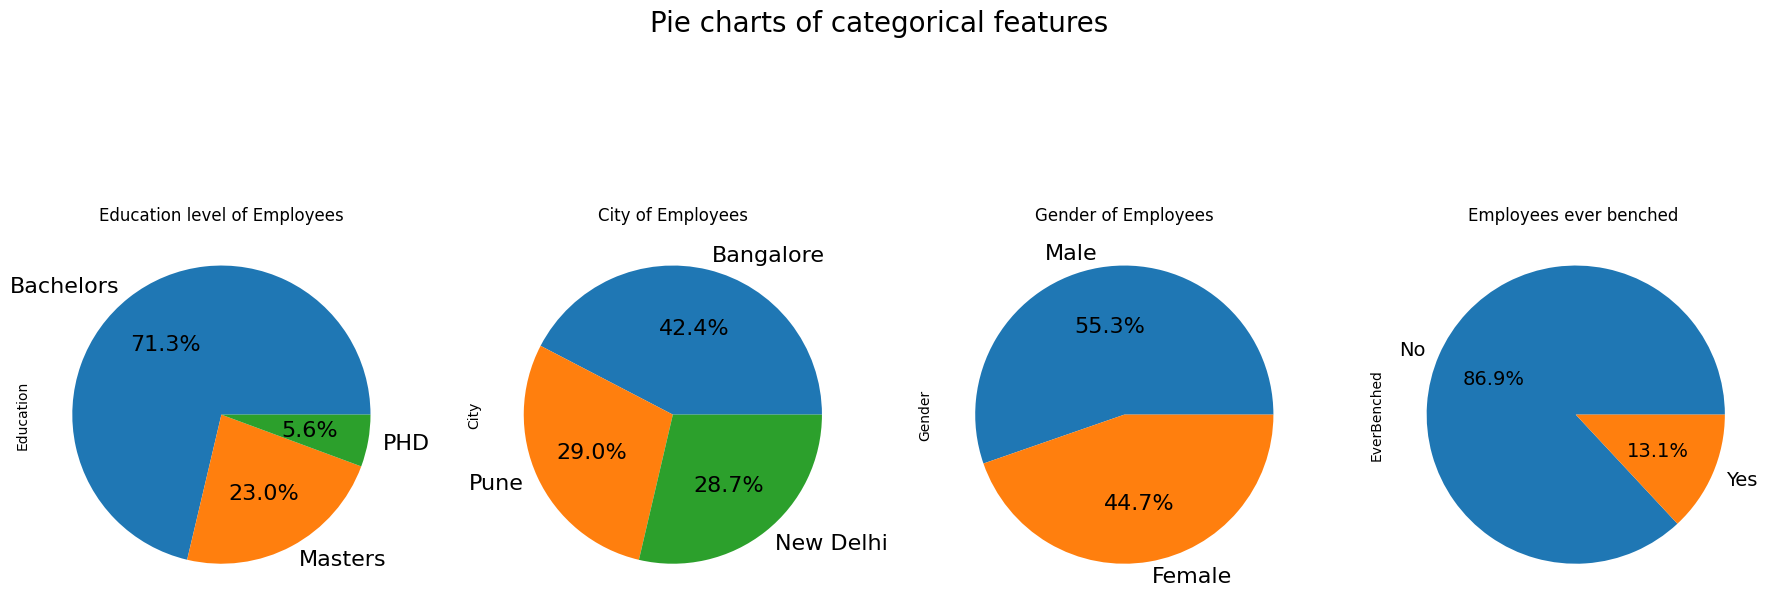

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18,8))

pie1=pd.DataFrame(employee_df['Education'].value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Education level of Employees',y = 'Education', 
             autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=16, ax=ax1)

pie2=pd.DataFrame(employee_df['City'].value_counts())
pie2.reset_index(inplace=True)
pie2.plot(kind='pie', title='City of Employees',y = 'City', 
             autopct='%1.1f%%', shadow=False, labels=pie2['index'], legend = False, fontsize=16, ax=ax2)

pie3=pd.DataFrame(employee_df['Gender'].value_counts())
pie3.reset_index(inplace=True)
pie3.plot(kind='pie', title='Gender of Employees',y = 'Gender', 
             autopct='%1.1f%%', shadow=False, labels=pie3['index'], legend = False, fontsize=16, ax=ax3)

pie4=pd.DataFrame(employee_df['EverBenched'].value_counts())
pie4.reset_index(inplace=True)
pie4.plot(kind='pie', title='Employees ever benched ',y = 'EverBenched', 
             autopct='%1.1f%%', shadow=False, labels=pie4['index'], legend = False, fontsize=14, ax=ax4)

fig.suptitle('Pie charts of categorical features', fontsize=20)
fig.tight_layout()


In [ ]:
# Define the variable names, colors, and titles for the pie charts
pie_vars = {
    'Education': {'title': 'Education Level of Employees'},
    'City': {'title': 'City of Employees'},
    'Gender': {'title': 'Gender of Employees'},
    'EverBenched': {'title': 'Employees Ever Benched'}
}

# Loop through the variables and create pie charts
for var, attr in pie_vars.items():
    fig = px.pie(employee_df, names=var, title=attr['title'])
    fig.update_traces(textinfo='percent+label')
    fig.show()

In [ ]:
# Define the variable names, colors, and titles for the histograms
hist_vars = {
    'JoiningYear': {'color': 'red', 'title': 'JoiningYear Distribution'},
    'PaymentTier': {'color': 'blue', 'title': 'PaymentTier Distribution'},
    'Age': {'color': 'green', 'title': 'Age Distribution'},
    'ExperienceInCurrentDomain': {'color': 'yellow', 'title': 'ExperienceInCurrentDomain Distribution'}
}

# Loop through the variables and create histograms
for var, attr in hist_vars.items():
    fig = go.Figure()
    hist_data = np.histogram(employee_df[var], bins=20)
    fig.add_trace(go.Bar(x=hist_data[1][:-1], y=hist_data[0], marker_color=attr['color'], name=attr['title'],
                         text=hist_data[0],
                         textposition='auto'))

    # Update the layout and axis titles
    fig.update_layout(
        title=attr['title'],
        xaxis_title="Value",
        yaxis_title="Frequency",
        showlegend=False
    )

    # Show the plot
    fig.show()


In [ ]:

# Bar chart for LeaveOrNot variable
fig = px.bar(employee_df['LeaveOrNot'].value_counts(), title='LeaveOrNot')
fig.update_layout(
    xaxis_title="LeaveOrNot",
    yaxis_title="Count",
    legend_title="Legend",
    legend=dict(x=1, y=1, traceorder="normal", font=dict(family="sans-serif",size=12,color="black"),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='LightSkyBlue'),
    showlegend=True,
    name='0: Employee has not left the company'))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='LightSkyBlue'),
    showlegend=True,
    name='1: Employee has left the company'))

fig.show()

# **Bivariate Analysis**

Bivariate analysis is a statistical method that involves the **analysis of two variables to determine the empirical relationship between them.** It can be used to test hypotheses, identify trends and patterns, and explore associations between variables. There are several techniques that can be used for bivariate analysis, including scatter plots, correlation analysis, and regression analysis. 

In [ ]:
# Create frequency distribution of 'Education' by gender
education_gender_counts = employee_df.groupby(['Education', 'Gender']).size().reset_index(name='count')

fig = go.Figure()

for gender, color in zip(education_gender_counts['Gender'].unique(), ['LightSkyBlue', 'MediumPurple']):
    subset = education_gender_counts[education_gender_counts['Gender'] == gender]
    
    fig.add_trace(go.Bar(
        x=subset['Education'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=gender,
        marker=dict(color=color)
    ))

fig.update_layout(
    title="Frequency Distribution of 'Education' by Gender",
    xaxis_title="Education Level",
    yaxis_title="Count",
    legend_title="Gender"
)

fig.show()

In [ ]:
# Clustered Bar Chart: PaymentTier vs LeaveOrNot
payment_leave_counts = employee_df.groupby(['PaymentTier', 'LeaveOrNot']).size().reset_index(name='count')

fig = go.Figure()

for leave, color in zip(payment_leave_counts['LeaveOrNot'].unique(), ['LightSkyBlue', 'MediumPurple']):
    subset = payment_leave_counts[payment_leave_counts['LeaveOrNot'] == leave]
    
    fig.add_trace(go.Bar(
        x=subset['PaymentTier'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=str(leave),
        marker=dict(color=color)
    ))

fig.update_layout(
    title='PaymentTier vs LeaveOrNot',
    xaxis_title="PaymentTier",
    yaxis_title="Count",
    legend_title="LeaveOrNot"
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# Clustered Bar Chart: JoiningYear vs LeaveOrNot
joining_leave_counts = employee_df.groupby(['JoiningYear', 'LeaveOrNot']).size().reset_index(name='count')

fig = go.Figure()

colors = ['rgb(25, 155, 255)', 'rgb(255, 91, 71)']

for leave, color in zip(joining_leave_counts['LeaveOrNot'].unique(), colors):
    subset = joining_leave_counts[joining_leave_counts['LeaveOrNot'] == leave]
    
    fig.add_trace(go.Bar(
        x=subset['JoiningYear'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=str(leave),
        marker=dict(color=color)
    ))

fig.update_layout(
    title='JoiningYear vs LeaveOrNot',
    xaxis_title="JoiningYear",
    yaxis_title="Count",
    legend_title="LeaveOrNot"
)

fig.show()

In [ ]:
# Histogram: Age distribution by LeaveOrNot
fig3 = px.histogram(employee_df, x='Age', color='LeaveOrNot', nbins=20, title='Age Distribution by LeaveOrNot')
fig3.show()

In [ ]:
# Histogram: ExperienceInCurrentDomain distribution by LeaveOrNot
exp_leave_counts = employee_df.groupby(['ExperienceInCurrentDomain', 'LeaveOrNot']).size().reset_index(name='count')

fig = go.Figure()

colors = ['rgb(76, 175, 80)', 'rgb(244, 67, 54)']

for leave, color in zip(exp_leave_counts['LeaveOrNot'].unique(), colors):
    subset = exp_leave_counts[exp_leave_counts['LeaveOrNot'] == leave]
    
    fig.add_trace(go.Bar(
        x=subset['ExperienceInCurrentDomain'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=str(leave),
        marker=dict(color=color)
    ))

fig.update_layout(
    title='ExperienceInCurrentDomain Distribution by LeaveOrNot',
    xaxis_title="Experience In Current Domain",
    yaxis_title="Count",
    legend_title="LeaveOrNot"
)

fig.show()


The code below creates a correlation heatmap to visualize the pairwise correlation between numerical variables in the employee data frame. This is a form of bivariate analysis, which involves the analysis of two variables to determine the empirical relationship between them.

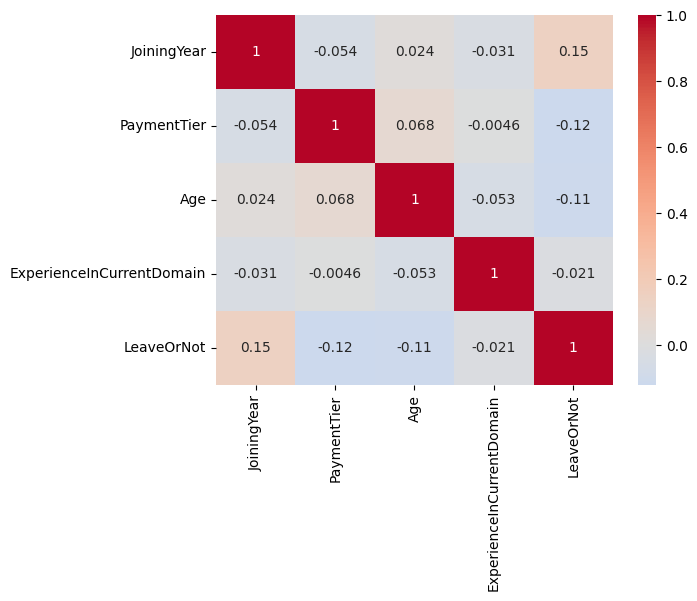

In [ ]:
# Calculate the correlation matrix
corr_matrix = employee_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

**The heatmap above describes the correlation between various numeric variables in the dataset, including JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, and LeaveOrNot.**

The correlation matrix provides insight into the linear relationships between these variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). A value close to 0 indicates a weak or no correlation.

**JoiningYear:**
**JoiningYear has a positive correlation with LeaveOrNot (0.15)**, suggesting that employees who joined the company more recently are slightly more likely to leave the company. On the other hand, **it has a weak negative correlation with PaymentTier (-0.05)**, which implies that employees who joined more recently are slightly more likely to be in lower payment tiers.

**PaymentTier:**
**PaymentTier has a negative correlation with LeaveOrNot (-0.12),** indicating that employees in higher payment tiers are less likely to leave the company. **PaymentTier shows weak correlations with Age (0.07)** and **ExperienceInCurrentDomain (-0.004),** suggesting that these factors do not have a strong linear relationship with an employee's payment tier.

**Age:**
**Age has a weak negative correlation with ExperienceInCurrentDomain (-0.05),** indicating that as employees get older, they tend to have slightly less experience in their current domain. **Age shows a weak negative correlation with LeaveOrNot (-0.11),** suggesting that older employees are slightly less likely to leave the company.

**ExperienceInCurrentDomain:**
**ExperienceInCurrentDomain has a weak negative correlation with LeaveOrNot (-0.02),** indicating that employees with more experience in their current domain are slightly less likely to leave the company.

This suggests that employees who have developed expertise within their roles are more likely to stay with the organization. The Company may want to focus on opportunities for skill development and career advancement to encourage employee retention.

**Now let's investigate whether there maybe evidence of multicollinearity**

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated, which can lead to unreliable and unstable estimates in regression analysis. When examining the correlation matrix, we are looking for correlation coefficients that are close to -1 or 1, as this would indicate a strong linear relationship between the variables.

**There is no evidence of multicollinearity among the variables in this correlation matrix, as none of the coefficients are close to -1 or 1. The highest absolute correlation value is 0.150649585 (between JoiningYear and LeaveOrNot), which indicates a weak positive relationship. The remaining coefficients are also weak, ranging from -0.11989133 to 0.067514197.**

Given the weak correlations in the matrix, it is unlikely that multicollinearity is a concern in this dataset.

# **Multivariate Analysis**

Multivariate analysis is a statistical method used to analyze data that involves multiple variables or measurements. It allows you to gain a deeper understanding of the relationships between multiple variables simultaneously.

In [ ]:
# Clustered Bar Chart: PaymentTier vs LeaveOrNot, grouped by JoiningYear
fig1 = px.histogram(employee_df, x='PaymentTier', y='LeaveOrNot', color='LeaveOrNot',
                    histfunc='count', nbins=3,
                    facet_col='JoiningYear', facet_col_wrap=3,
                    barmode='group',
                    title='PaymentTier vs LeaveOrNot, Grouped by JoiningYear')
fig1.show()

The given code below creates a pair plot using the pairplot function from the seaborn library. A pair plot is a type of multivariate analysis that displays the relationships between multiple pairs of variables in a dataset. In this case, the pair plot is created for the numerical variables in the employee_df DataFrame, with the hue set to the LeaveOrNot column. This means that the data points in the plot will be colored based on their LeaveOrNot value.

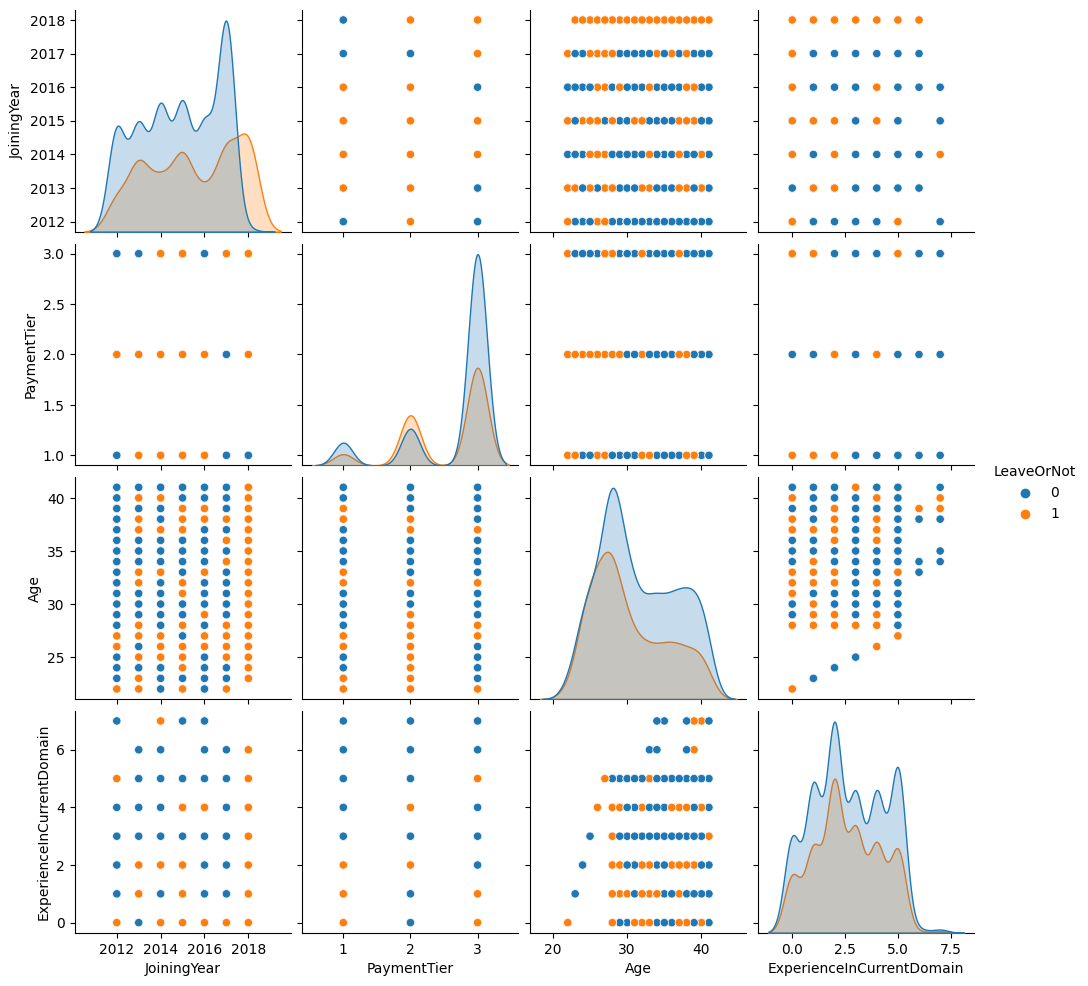

In [ ]:
# Pair plot for numerical variables
sns.pairplot(employee_df, hue='LeaveOrNot')

In [ ]:
employee_df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
employee_df.shape

(2764, 9)



---
<a name="feature_engineering"></a>
# **Feature Engineering**

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

It involves selecting, transforming, extracting, combining, and manipulating raw data to generate the desired variables for analysis or predictive modeling. It is a crucial step in developing a machine learning model.

Domain knowledge refers to the understanding and expertise of a specific field or industry that a data scientist or analyst possesses. This knowledge helps them make informed decisions when working with data, creating new features, and building machine learning models. In the context of feature engineering, domain knowledge allows the data scientist to identify relevant variables, understand the relationships between them, and create new, meaningful features that can improve the performance of a machine learning model.

To enhance the feature engineering process, you can consider the following 
techniques and transformations:




---
<a name="encoding"></a>
# **Encoding**

Encoding is the process of converting data from one format to another. In the context of machine learning and data analysis, encoding often refers to the process of converting categorical data into numerical data that can be used in a model. There are several methods for encoding categorical data, including one-hot encoding, label encoding, and binary encoding.
<br><br>
Encoding is an important step in preparing data for machine learning algorithms, as many algorithms cannot handle categorical data in its raw form and the choice of a method depends on the specific problem at hand. 

### **One Hot Encoding**

One-hot encoding is a technique used to convert categorical variables into binary (dummy) variables, which take the values 0 or 1. 
Each category within a categorical variable is represented by a separate binary variable, indicating the presence or absence of that category in an observation.

For example, for the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate the variable "male", which takes 1 if the person is 'male' and 0 otherwise.

**Example: Encoding Gender, Education, City,  Variables**
For the categorical variable "Gender", with labels 'female' and 'male', we can generate a binary variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate a binary variable "male", which takes 1 if the person is 'male' and 0 otherwise.

**Education**
['Bachelors', 'Masters', 'PHD']
Categories (3, object): ['Bachelors', 'Masters', 'PHD']


**City**
['Bangalore', 'New Delhi', 'Pune']
Categories (3, object): ['Bangalore', 'New Delhi', 'Pune']

For the categorical variable "colour" with values 'red', 'blue' and 'green', we can create 3 new variables called "red", "blue" and "green". These variables will take the value 1, if the observation is of the said colour or 0 otherwise. 


### **Encoding into k-1 dummy variables**

Note however, that for the variable "colour", by creating 2 binary variables, say "red" and "blue", we already encode **ALL** the information:

- if the observation is red, it will be captured by the variable "red" (red = 1, blue = 0)
- if the observation is blue, it will be captured by the variable "blue" (red = 0, blue = 1)
- if the observation is green, it will be captured by the combination of "red" and "blue" (red = 0, blue = 0)

We do not need to add a third variable "green" to capture that the observation is green.

More generally, a categorical variable should be encoded by creating k-1 binary variables, where k is the number of distinct categories. In the case of gender, k=2 (male / female), therefore we need to create only 1 (k - 1 = 1) binary variable. In the case of colour, which has 3 different categories (k=3), we need to create 2 (k - 1 = 2) binary variables to capture all the information.

One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (not present) binary variable.

**When one hot encoding categorical variables, we create k - 1 binary variables**


Most machine learning algorithms, consider the entire data set while being fit. Therefore, encoding categorical variables into k - 1 binary variables, is better, as it avoids introducing redundant information.

### **Advantages of one hot encoding**

- Straightforward to implement
- Makes no assumption about the distribution or categories of the categorical variable
- Keeps all the information of the categorical variable
- Suitable for linear models

### **Limitations**

- Expands the feature space
- Does not add extra information while encoding
- Many dummy variables may be identical, introducing redundant information

**The 'PaymentTier' feature already has values of 1, 2, and 3, hence there is no need to apply ordinal encoding.**
<br>In this case, the feature is already in a suitable numerical format for machine learning algorithms. Ordinal encoding is necessary when the values of an ordinal feature are in a non-numeric format, such as strings
(ordinal_encoding_payment_tier = **{'Tier 1': 1,'Tier 2': 2,'Tier 3': 3}** or labels that indicate an order or rank.

In [ ]:
# Dummy variable encoding of City and Education
cat_features = ['City', 'Education']
employee_df = pd.get_dummies(employee_df, columns=cat_features, drop_first=True)

# Binarizing Gender and EverBenched features:
employee_df['Gender'] = employee_df['Gender'].replace('Male', 1).replace('Female', 0)
employee_df['EverBenched'] = employee_df['EverBenched'].replace('Yes', 1).replace('No', 0)

The **'pd.get_dummies()' function is used to one-hot encode the 'City' feature in the 'employee_df' DataFrame.** 
<br><br>**The 'columns' parameter is set to 'cat_features', which indicates that only the 'City' column will be one-hot encoded.**<br><br>
**The 'drop_first=True' parameter ensures that the first category for the 'City' feature is dropped, to avoid multicollinearity.**

When one-hot encoding is applied to a categorical feature, it creates a new binary feature for each category in the original feature. However, including all of these binary features in a model can lead to multicollinearity, which is when two or more features are highly correlated. In the presence of multicollinearity, it becomes difficult for the model to determine the individual effect of each feature on the target variable, as they can be easily explained by other correlated features. This can lead to unstable estimates and reduced interpretability of the model.

**To avoid multicollinearity, one common practice is to drop one of the binary features created during one-hot encoding.** The rationale behind this is that if all other categories have a value of 0, the dropped category is implicitly represented as 1. For example, **when one-hot encoding the 'City' feature with categories 'Bangalore', 'Pune', and 'New Delhi', we create three binary features: 'City_Bangalore', 'City_Pune', and 'City_New Delhi'. By dropping the first category (e.g., 'City_Bangalore'), we can still infer its value based on the other two categories. If 'City_Pune' and 'City_New Delhi' are both 0, it means the city must be 'Bangalore'.**

In the code, the **'drop_first=True'** parameter in the **'pd.get_dummies()'** function is used to drop the first category of the **'City' feature.** This helps to prevent multicollinearity by reducing the number of correlated binary features in the model.

In [ ]:
employee_df

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Education_Masters,Education_PHD
0,2017,3,34,1,0,0,0,0,0,0,0
1,2013,1,28,0,0,3,1,0,1,0,0
2,2014,3,38,0,0,2,0,1,0,0,0
3,2016,3,27,1,0,5,1,0,0,1,0
4,2017,3,24,1,1,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4645,2017,2,31,0,0,2,0,0,1,1,0
4647,2016,3,30,1,0,2,0,0,1,0,0
4649,2013,2,37,1,0,2,1,0,1,1,0
4650,2018,3,27,1,0,5,1,1,0,1,0




---
<a name="feature_selection"></a>
# **Feature Selection**

Feature selection is the process of selecting a subset of relevant features for use in model construction. **This can involve techniques such as Chi-squared test: Correlation Matrix and Logistics Regression Feature Importance.** 

**Chi-squared test:** we are going to use this test to determine the relationship between **categorical features ('Education', 'City', 'PaymentTier', 'Gender', 'EverBenched')** and the **target variable ('LeaveOrNot')**. The p-values resulting from the chi-squared test  will show the significance of the association between each categorical feature and the target variable. 
**Lower p-values indicate a stronger relationship.** (NB:A p-value is a measure of the evidence against a null hypothesis.)

**Correlation matrix:** For **numerical features ('JoiningYear', 'Age', 'ExperienceInCurrentDomain')**, we will calculate the correlation matrix to identify the linear relationships among these features. This method helps to assess the potential for multicollinearity, which can cause issues in linear models like logistic regression.

**Logistic regression feature importance:**
This Regression Analysis will be used for estimating the relationship between a dependent variable (a.k.a the outcome, or target variable) and one or more independent variables (a.k.a predictors, covariates, explanatory variables, or features.

Thus, we will use logistic regression as a model-based feature selection technique. By fitting a logistic regression model to the data, we can examine the coefficients associated with each feature. **Larger absolute values of the coefficients indicate a more significant impact on the model's prediction.** This analysis helps in understanding which features are the most important when predicting the target variable.

The goal of feature selection is to reduce the dimensionality of the data and improve model performance by removing irrelevant or redundant features.

Chi-squared test p-values for categorical features:
EverBenched          6.868575e-02
PaymentTier          1.543200e-02
City_New Delhi       2.389057e-03
Education_PHD        4.513033e-04
Education_Masters    2.306477e-06
Gender               2.184067e-11
City_Pune            2.024029e-11
dtype: float64

Correlation matrix for numerical features:
                           JoiningYear       Age  ExperienceInCurrentDomain
JoiningYear                   1.000000  0.024445                  -0.031228
Age                           0.024445  1.000000                  -0.053276
ExperienceInCurrentDomain    -0.031228 -0.053276                   1.000000


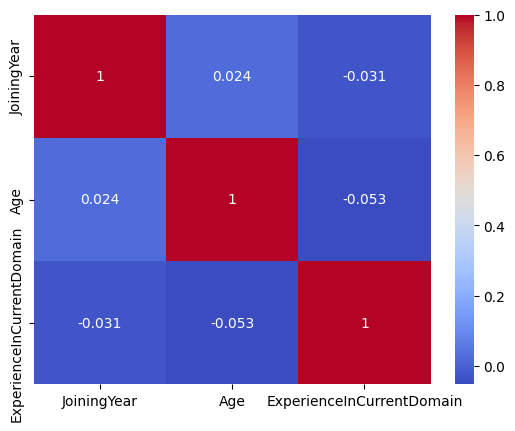


Feature importance using logistic regression:
Education_Masters            0.502724
City_Pune                    0.472392
JoiningYear                  0.298715
EverBenched                  0.212104
ExperienceInCurrentDomain   -0.084759
PaymentTier                 -0.172119
Age                         -0.217897
Education_PHD               -0.334026
City_New Delhi              -0.479753
Gender                      -0.835545
dtype: float64


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Divide the given list into categorical and numerical features
categorical_features = ['City_New Delhi', 'City_Pune', 'Education_Masters', 
                        'Education_PHD', 'PaymentTier', 'Gender', 'EverBenched']

numerical_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

# Perform chi-squared test for categorical features
X_cat = employee_df[categorical_features]
y = employee_df['LeaveOrNot']
chi_scores = chi2(X_cat, y)

# Display chi-squared test results in a dataframe
p_values = pd.Series(chi_scores[1], index=categorical_features)
p_values.sort_values(ascending=False, inplace=True)
print("Chi-squared test p-values for categorical features:")
print(p_values)

# Calculate the correlation matrix for numerical features
corr_matrix = employee_df[numerical_features].corr()
print("\nCorrelation matrix for numerical features:")
print(corr_matrix)

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Feature importance using logistic regression
X_num = employee_df[numerical_features]
X = pd.concat([X_cat, X_num], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train a logistic regression model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(logreg.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("\nFeature importance using logistic regression:")
print(feature_importance)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Importance': feature_importance.values})

# Visualize the feature importances using Plotly Express
fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance using Logistic Regression')
fig.show()


Based on the results from the chi-squared test, correlation matrix, and logistic regression feature importance, we can provide the following data analytics report:
Chi-squared Test for Categorical Features: The chi-squared test is used to determine whether there is a significant relationship between two categorical variables. In this case, we are testing the relationship between each categorical feature and the target variable 'LeaveOrNot'.
<br><br>
**The p-values from the test are as follows:**
- Gender: 2.18e-11
- City_Pune: 2.02e-11
- Education_Masters: 2.31e-06
- Education_PHD: 4.51e-04
- City_New Delhi: 2.39e-03
- PaymentTier: 1.54e-02
- EverBenched: 6.87e-02
<br><br>
Lower p-values indicate stronger relationships between the categorical feature and the target variable. In this case, 'Gender' and 'City_Pune' have the lowest p-values, suggesting that these features have the strongest relationships with the target variable. On the other hand, 'EverBenched' has the highest p-value, indicating a weaker relationship with the target variable.
Correlation Matrix for Numerical Features: The correlation matrix shows the correlation coefficients between numerical features. These coefficients range from -1 to 1, with values close to -1 or 1 indicating strong negative or positive correlations, respectively, and values close to 0 indicating weak or no correlation.
________________________________________
JoiningYear has a weak positive correlation with Age (0.024) and a weak negative correlation with ExperienceInCurrentDomain (-0.031). Age has a weak negative correlation with ExperienceInCurrentDomain (-0.053). Therefore, the numerical features have weak correlations with each other.
________________________________________
**Logistic Regression Feature Importance:**

The logistic regression model assigns a coefficient to each feature, which indicates the strength and direction of the relationship between the feature and the target variable. Positive coefficients suggest that an increase in the feature value leads to an increased probability of the target variable being 1 (employee leaving), while negative coefficients suggest the opposite.
***********************************
- Education_Masters: 0.503 (positive relationship)
- City_Pune: 0.472 (positive relationship)
- JoiningYear: 0.299 (positive relationship)
- EverBenched: 0.212 (positive relationship)
- ExperienceInCurrentDomain: -0.085 (negative relationship)
- PaymentTier: -0.172 (negative relationship)
- Age: -0.218 (negative relationship)
- Education_PHD: -0.334 (negative relationship)
- City_New Delhi: -0.480 (negative relationship)
- Gender: -0.836 (negative relationship)
*****************************************************
**With respect to the results from the logistic regression model, 'Gender' has the strongest negative relationship with the target variable, indicating that a change in gender has a significant impact on the likelihood of an employee leaving.**

**'Education_Masters' and 'City_Pune' have the strongest positive relationships, suggesting that having a master's degree and being located in Pune also have notable effects on the target variable.** Other features such as 'EverBenched', 'JoiningYear', and 'PaymentTier' also show moderate relationships with the target variable.

Our Inference: Taking into account the results from the chi-squared test, correlation matrix, and logistic regression feature importance, we can conclude that 'Gender', 'City_Pune', 'Education_Masters', and 'EverBenched' are the most important features for predicting whether an employee will leave or not.

**Furthermore, 'PaymentTier' is a categorical variable representing different levels or categories of payment for employees. Its negative relationship implies that higher payment tiers are associated with a lower likelihood of employees leaving the company.**
We can, therefore, include 'PaymentTier' among the selected features ('Gender', 'City_Pune', 'Education_Masters', and 'EverBenched') for your logistic regression model. The chi-squared test and the logistic regression feature importance analysis both suggest that 'PaymentTier' is significantly related to the target variable 'LeaveOrNot', and can potentially help improve the predictive performance of the model.

Adding 'PaymentTier' to the list of selected features would help capture the relationship between the different payment levels and employee attrition, providing additional information to the model. This comprehensive set of features, which also includes 'Gender', 'City_Pune', 'Education_Masters', and 'EverBenched', will allow the model to account for various factors that influence an employee's decision to leave or stay with the company.

Consequently, by considering the findings from the chi-squared test, correlation matrix, and logistic regression feature importance, we have identified 'Gender', 'City_Pune', 'Education_Masters', 'EverBenched', and 'PaymentTier' as the most important features for predicting employee attrition. Incorporating these features into your logistic regression model will improve its predictive performance and help you better understand the factors that drive employee turnover.


# Training and Testing (Validating) the Models

**Models to be used:**

**Part1**
- Logistic Regression
- Logistic Lasso
- Logistic Ridge 

**Logistic Regression, Logistic Lasso, and Logistic Ridge** are all variations of logistic regression used for classification tasks. The primary difference between them lies in the type of regularization applied to the model during the training process. Regularization is a technique that helps to prevent overfitting by adding a penalty term to the loss function. Here are the differences between these three methods:
****************************************************

**Logistic Regression** is a simple classification model that uses the logistic function (sigmoid function) to predict the probability of a target variable belonging to a specific class. It does not include any regularization term in its loss function. This model may be prone to overfitting if there are a large number of features or if some features are highly correlated.
***********************************************
**Logistic Lasso (L1 Regularization):***
Logistic Lasso is a variation of logistic regression that incorporates L1 regularization in its loss function. L1 regularization adds the absolute values of the model coefficients as a penalty term. This regularization method encourages sparsity in the model, which means some of the less important features may have their coefficients reduced to zero. This has the effect of performing feature selection, allowing the model to focus on the most important features while ignoring the less relevant ones. Logistic Lasso can be particularly useful when dealing with a large number of features, as it helps to reduce overfitting and improve model interpretability.
**********************************************
**Logistic Ridge (L2 Regularization):**
Logistic Ridge is another variation of logistic regression that incorporates L2 regularization in its loss function. L2 regularization adds the squared values of the model coefficients as a penalty term. This regularization method does not encourage sparsity like L1 regularization but rather shrinks the coefficients of less important features towards zero. The effect is that Logistic Ridge can help prevent overfitting by distributing the weights more evenly across all features. This method can be beneficial when dealing with multicollinearity, as it helps to stabilize the model coefficients and improve model generalization.
****************************************************
To sum it up, the main differences between **Logistic Regression, Logistic Lasso, and Logistic Ridge** are the types of regularization applied during the training process. Logistic Lasso uses L1 regularization, which promotes sparsity and can perform feature selection, while Logistic Ridge uses L2 regularization, which helps to distribute the model coefficients more evenly and deal with multicollinearity. Logistic Regression does not use any regularization, which may make it more prone to overfitting in certain situations.



**Part2**

**Models to be used:**

- Support Vector Machine (SVM)
- Random Forest: RandomForestClassifier
- Gradient Boosting': GradientBoostingClassifier(), and 
- KNN: KNeighborsClassifier(),


**Support Vector Machine (SVM):**
SVM is a supervised machine learning algorithm used for classification and regression tasks. It aims to find an optimal hyperplane that separates the data points of different classes with the maximum margin. SVM can handle linearly separable and non-linearly separable data by using kernel functions such as linear, polynomial, radial basis function (RBF), and sigmoid. SVM is effective in high-dimensional spaces and relatively small datasets, but it may have poor performance on large datasets with a high number of features and noise.
*****************************************
**Random Forest (RandomForestClassifier):**
Random Forest is an ensemble learning method that constructs multiple decision trees during training and combines their predictions to produce a more accurate and stable output. It uses techniques like bagging (Bootstrap Aggregating) and feature randomness to create diverse trees, which helps to reduce overfitting and improve generalization. Random Forest is robust to noise and outliers, can handle a large number of features, and can naturally perform feature selection. However, it may have longer training times compared to other methods, and the resulting model can be complex and hard to interpret.
*********************************************
**Gradient Boosting (GradientBoostingClassifier):**
Gradient Boosting is another ensemble learning method that constructs a series of weak learners (typically decision trees) in a sequential manner, where each subsequent learner attempts to correct the errors made by the previous one. The final prediction is a weighted sum of the predictions from individual weak learners. Gradient Boosting can handle a variety of data types, is robust to outliers, and can perform feature selection. However, it is more sensitive to hyperparameter settings and may require careful tuning. Additionally, it can be slower to train than other ensemble methods like Random Forest due to its sequential nature.
**************************************************************
**K-Nearest Neighbors (KNeighborsClassifier):**
KNN is a non-parametric and instance-based learning algorithm used for classification and regression tasks. It works by finding the k-nearest training examples to a given test instance and predicting the class based on the majority vote of the nearest neighbors. KNN is simple to implement, can handle multi-class problems, and is suitable for datasets with non-linear boundaries. However, it has high computational complexity, especially for large datasets, and is sensitive to the choice of k and distance metric. It also performs poorly on high-dimensional data and in the presence of noisy features.
******************************************************

Consequently, each classification model has its strengths and weaknesses. The choice of the model depends on the specific problem, the nature of the data, and the trade-offs between accuracy, interpretability, training time, and computational complexity.

In [ ]:
employee_df.head(3)

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Education_Masters,Education_PHD
0,2017,3,34,1,0,0,0,0,0,0,0
1,2013,1,28,0,0,3,1,0,1,0,0
2,2014,3,38,0,0,2,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label=employee_df['LeaveOrNot']

# Encode the 'Gender' and 'EverBenched' columns as integers
le_gender = LabelEncoder()
le_everbenched = LabelEncoder()
employee_df['Gender_encoded'] = le_gender.fit_transform(employee_df['Gender'])
employee_df['EverBenched_encoded'] = le_everbenched.fit_transform(employee_df['EverBenched'])

# Create the interaction feature
employee_df['GenderEverBenched'] = employee_df['Gender_encoded'] * employee_df['EverBenched_encoded']

# Separate the features and target variable
features = employee_df.drop(['LeaveOrNot', 'Gender', 'EverBenched'], axis=1)
target = employee_df['LeaveOrNot']

# Split the dataset into training and validation (testing) sets
X_train, X_val, label_train, label_val = train_test_split(features, target, test_size=0.20, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shapes:", X_train.shape, label_train.shape)
print("Validation set shapes:", X_val.shape, label_val.shape)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation (testing) data using the same scaler
X_val_scaled = scaler.transform(X_val)

# Now, X_train_scaled and X_val_scaled are the standardized versions of 
# the training and validation datasets

Training set shapes: (2211, 11) (2211,)
Validation set shapes: (553, 11) (553,)


In [ ]:
employee_df.head(3)

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Education_Masters,Education_PHD,Gender_encoded,EverBenched_encoded,GenderEverBenched
0,2017,3,34,1,0,0,0,0,0,0,0,1,0,0
1,2013,1,28,0,0,3,1,0,1,0,0,0,0,0
2,2014,3,38,0,0,2,0,1,0,0,0,0,0,0


Classification report for Logistic:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       333
           1       0.67      0.46      0.55       220

    accuracy                           0.69       553
   macro avg       0.69      0.66      0.66       553
weighted avg       0.69      0.69      0.68       553

Classification report for Logistic Lasso:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       333
           1       0.68      0.41      0.52       220

    accuracy                           0.69       553
   macro avg       0.69      0.64      0.64       553
weighted avg       0.69      0.69      0.67       553

Classification report for Logistic Ridge:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       333
           1       0.66      0.47      0.55       220

    accuracy                           0.69       553
   macro

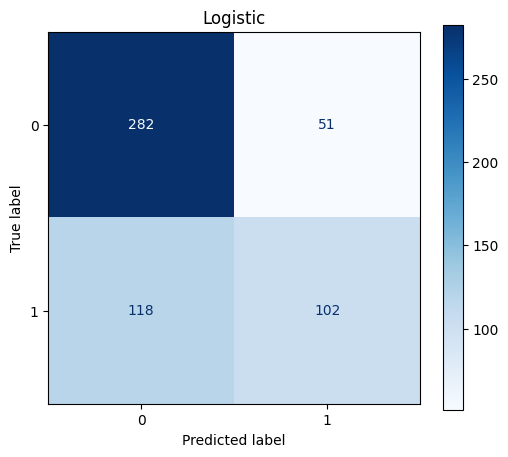

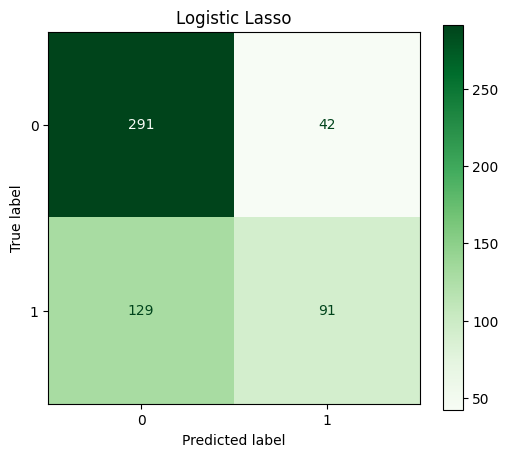

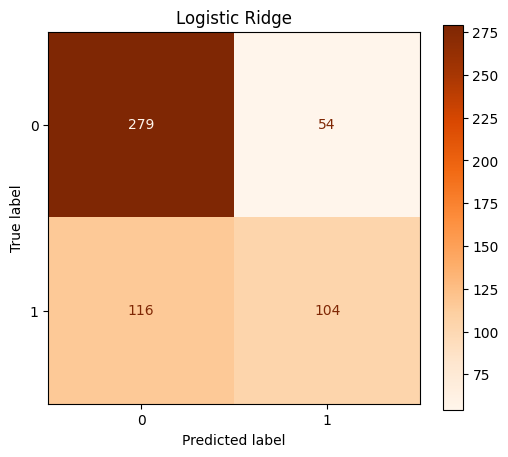

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Fit logistic regression models
logreg = LogisticRegression(solver='liblinear').fit(X_train_scaled, label_train)
logreg_l1 = LogisticRegressionCV(Cs=15, cv=4, penalty='l1', solver='liblinear').fit(X_train_scaled, label_train)
logreg_l2 = LogisticRegressionCV(Cs=15, cv=4, penalty='l2', solver='liblinear').fit(X_train_scaled, label_train)

# Store predictions and probabilities
model_names = ['Logistic', 'Logistic Lasso', 'Logistic Ridge']
models = [logreg, logreg_l1, logreg_l2]
predictions = []
probabilities = []

for model in models:
    predictions.append(pd.Series(model.predict(X_val_scaled)))
    probabilities.append(pd.Series(model.predict_proba(X_val_scaled).max(axis=1)))

predictions = pd.concat(predictions, axis=1, keys=model_names)
probabilities = pd.concat(probabilities, axis=1, keys=model_names)

# Display classification reports
for name, prediction in predictions.iteritems():
    print(f'Classification report for {name}:')
    print(classification_report(label_val, prediction))

# Define colormap for each classifier
cmaps = {
    'Logistic': 'Blues',
    'Logistic Lasso': 'Greens',
    'Logistic Ridge': 'Oranges'
}

# Calculate metrics
metrics = []
conf_matrices = {}

for name, prediction in predictions.iteritems():
    precision, recall, fscore, _ = precision_recall_fscore_support(label_val, prediction, average='weighted')
    accuracy = accuracy_score(label_val, prediction)
    auc = roc_auc_score(label_binarize(label_val, classes=[0, 1]),
                        label_binarize(prediction, classes=[0, 1]), 
                        average='weighted')
    conf_matrices[name] = confusion_matrix(label_val, prediction)
    metrics.append(pd.Series({'precision': precision, 'recall': recall, 'fscore': fscore, 'accuracy':
                              accuracy, 'auc': auc}, name=name))

metrics = pd.concat(metrics, axis=1)

for name in model_names:
    # Display confusion matrix with specified colormap
    fig, ax = plt.subplots(figsize=(6, 5))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrices[name], display_labels=models[0].classes_)
    display.plot(cmap=cmaps[name], ax=ax)
    ax.set_title(name)
    plt.show()

The report below is a comparative analysis of three classification models applied to the employee_df dataset: Logistic Regression, Lasso Regression (L1 Regularization), and Ridge Regression (L2 Regularization). The performance of each model is evaluated using their confusion matrices, which display the number of true positives, true negatives, false positives, and false negatives.
<br><br>
**When comparing the three models, we can observe the following insights:**
***************************************************************************************************
**All three models have the same accuracy of 0.69.**
The Logistic Lasso model has the highest number of True Negatives (291) and the lowest number of False Positives (42), which indicates that it is slightly better at predicting class 0 compared to the other models.
*********************************************************************************************
The Logistic Regression and Ridge Regression models both have the same number of True Positives (102) and a similar number of False Negatives (118 and 116, respectively), indicating that they have similar performance in predicting class 1. 
*****************************************************************************
The Logistic Lasso model has a slightly lower number of True Positives (91) and a higher number of False Negatives (129), which suggests that its performance in predicting class 1 is not as good as the other models.
***************************************************************************************************
Conclusion:
Based on the analysis of the confusion matrices and classification reports, the Logistic Regression model appears to have the best overall performance in terms of precision and f1-score, closely followed by the Logistic Lasso Regression model. The Logistic Ridge Regression model demonstrates slightly lower performance in predicting class 1. However, given the relatively small differences in performance metrics among the models, further analysis and additional testing with different datasets may be required to make a more informed decision.

Classification report for SVM:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       333
           1       0.85      0.56      0.67       220

    accuracy                           0.78       553
   macro avg       0.81      0.75      0.76       553
weighted avg       0.80      0.78      0.77       553



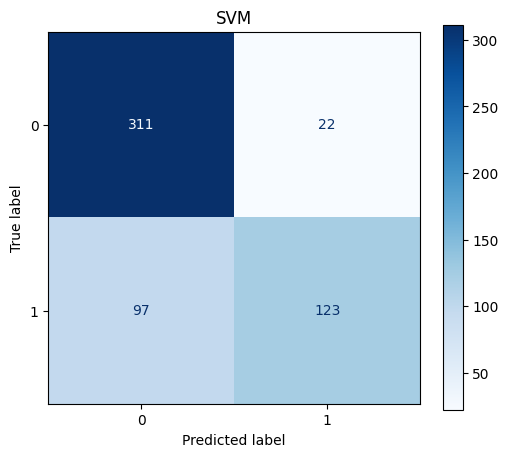

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       333
           1       0.67      0.60      0.63       220

    accuracy                           0.72       553
   macro avg       0.71      0.70      0.70       553
weighted avg       0.72      0.72      0.72       553



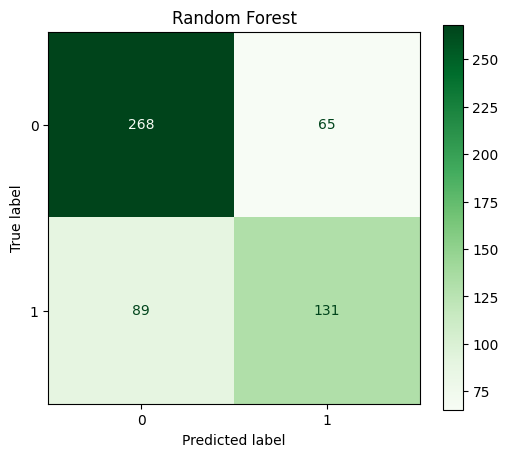

Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       333
           1       0.85      0.62      0.72       220

    accuracy                           0.80       553
   macro avg       0.82      0.77      0.78       553
weighted avg       0.81      0.80      0.80       553



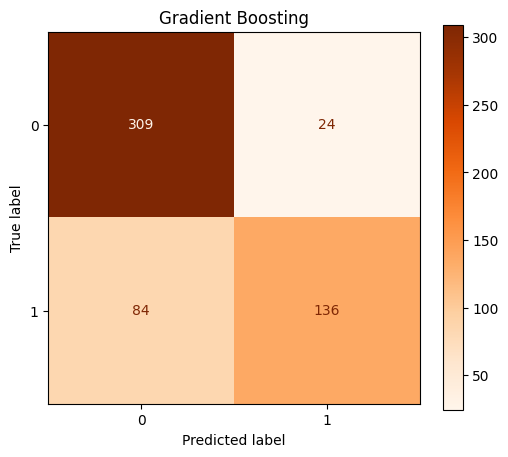

Classification report for KNN:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       333
           1       0.69      0.53      0.60       220

    accuracy                           0.72       553
   macro avg       0.71      0.69      0.69       553
weighted avg       0.72      0.72      0.71       553



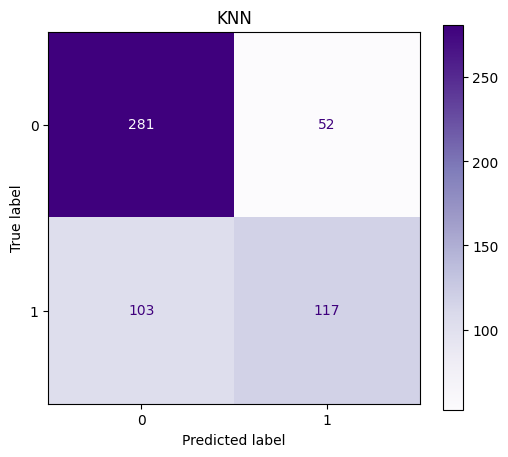

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define classifiers
classifiers = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
}


# Define colormap for each classifier
cmaps = {
    'SVM': 'Blues',
    'Random Forest': 'Greens',
    'Gradient Boosting': 'Oranges',
    'KNN': 'Purples',
   
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', classifier)])
    pipeline.fit(X_train, label_train)
    prediction = pipeline.predict(X_val)
    print(f'Classification report for {name}:')
    print(classification_report(label_val, prediction))

    # Display confusion matrix with specified colormap
    conf_matrix = confusion_matrix(label_val, prediction)
    fig, ax = plt.subplots(figsize=(6, 5))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.named_steps['classifier'].classes_)
    display.plot(cmap=cmaps[name], ax=ax)
    ax.set_title(name)
    plt.show()

**Analysis of the classification models' performance based on the classification reports**

**Support Vector Machines (SVM): The SVM model has an accuracy of 0.78, making it the second-best performing model.** The model has a strong performance in predicting class 1 with the highest precision of 0.85 among all the models. However, the recall for class 1 is only 0.56, which suggests that the model has difficulty identifying true positives for class 1.

**Random Forest: With an accuracy of 0.73, the Random Forest model ranks third among the models.** The model performs relatively well in predicting class 0 with an f1-score of 0.78. However, its performance in predicting class 1 is slightly lower than SVM and Gradient Boosting models, with an f1-score of 0.64.

**Gradient Boosting: The Gradient Boosting model has the highest accuracy of 0.80 among all the models**. It also has the highest f1-scores for both classes, with 0.85 for class 0 and 0.72 for class 1. This model demonstrates the best overall performance in terms of precision, recall, and f1-score.

**K-Nearest Neighbors (KNN): The KNN model has an accuracy of 0.72, placing it fourth among the models.** The model performs relatively well in predicting class 0 with an f1-score of 0.79. However, it has difficulty identifying true positives for class 1, as indicated by its lower recall of 0.53 compared to the other models.


**Hence, the Gradient Boosting model exhibits the best overall performance across all metrics,** closely followed by the SVM model. The Random Forest and KNN models display moderate performance.

Hyperparameter Tuning for Classification Models

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       333
           1       0.85      0.62      0.72       220

    accuracy                           0.81       553
   macro avg       0.82      0.78      0.79       553
weighted avg       0.81      0.81      0.80       553



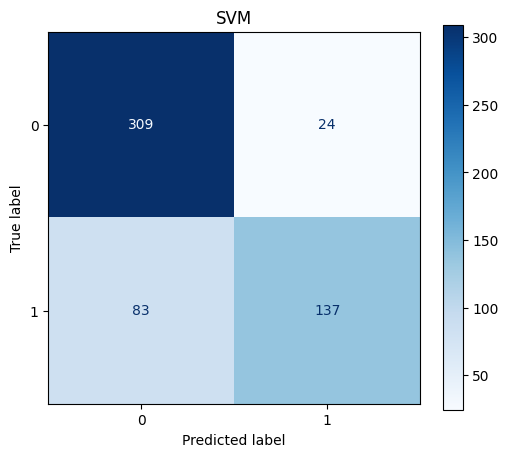

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       333
           1       0.85      0.61      0.71       220

    accuracy                           0.80       553
   macro avg       0.82      0.77      0.78       553
weighted avg       0.81      0.80      0.80       553



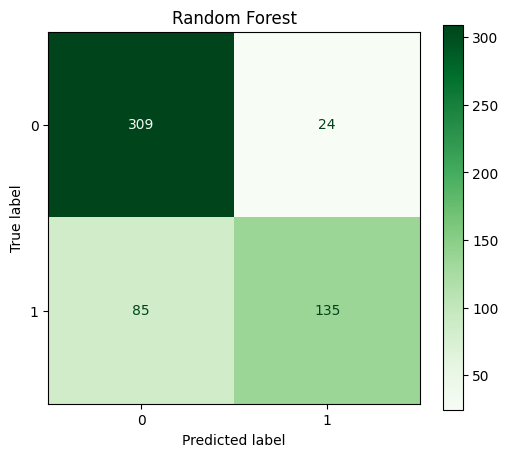

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       333
           1       0.87      0.62      0.72       220

    accuracy                           0.81       553
   macro avg       0.83      0.78      0.79       553
weighted avg       0.82      0.81      0.80       553



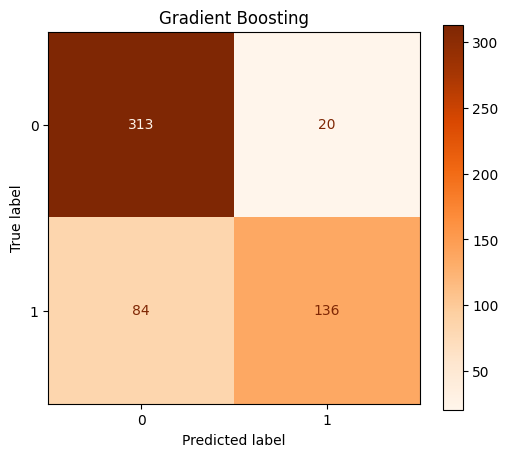

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Classification report for KNN:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       333
           1       0.75      0.54      0.62       220

    accuracy                           0.74       553
   macro avg       0.74      0.71      0.71       553
weighted avg       0.74      0.74      0.73       553



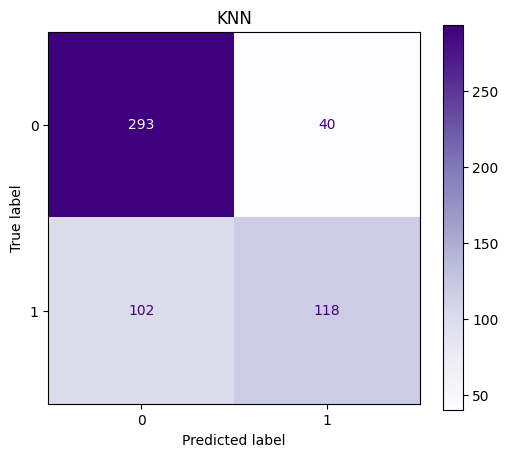

SVM:
  Best accuracy: 0.7906
  Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Random Forest:
  Best accuracy: 0.8069
  Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

Gradient Boosting:
  Best accuracy: 0.8078
  Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}

KNN:
  Best accuracy: 0.7404
  Best parameters: {'classifier__algorithm': 'brute', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}

Model selection results (using accuracy as the metric):
SVM: 0.807
Random Forest: 0.803
Gradient Boosting: 0.812
KNN: 0.743

The best model is: Gradient Boosting with an average accuracy of 0.812


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint

# Define classifiers
classifiers = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameter search space for each classifier

param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }   
}


# Define colormap for each classifier
cmaps = {
    'SVM': 'Blues',
    'Random Forest': 'Greens',
    'Gradient Boosting': 'Oranges',
    'KNN': 'Purples',
    'Naive Bayes': 'Reds'
}

# Train and evaluate classifiers with cross-validated grid search
best_estimators = {}
best_scores = {}
best_params = {}

for name, classifier in classifiers.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', classifier)])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, label_train)
    
    best_estimators[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    best_params[name] = grid_search.best_params_

    # Evaluate the classifiers on the validation set
    prediction = best_estimators[name].predict(X_val)
    print(f'Classification report for {name}:')
    print(classification_report(label_val, prediction))

    # Display confusion matrix with specified colormap
    conf_matrix = confusion_matrix(label_val, prediction)
    fig, ax = plt.subplots(figsize=(6, 5))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_estimators[name].named_steps['classifier'].classes_)
    display.plot(cmap=cmaps[name], ax=ax)
    ax.set_title(name)
    plt.show()

    # Save confusion matrix to CSV
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  columns=best_estimators[name].named_steps['classifier'].classes_, 
                                  index=best_estimators[name].named_steps['classifier'].classes_)
    conf_matrix_df.to_csv(f'{name}_confusion_matrix.csv', index_label='Actual\\Predicted')

# Print best hyperparameters and cross-validated scores for each classifier
for name in classifiers.keys():
    print(f"{name}:")
    print(f"  Best accuracy: {best_scores[name]:.4f}")
    print(f"  Best parameters: {best_params[name]}\n")

# Print model selection results
model_scores = {
    name: accuracy_score(label_val, estimator.predict(X_val))
    for name, estimator in best_estimators.items()
}

print("Model selection results (using accuracy as the metric):")
for model, score in model_scores.items():
    print(f"{model}: {score:.3f}")

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = classifiers[best_model_name]
print(f"\nThe best model is: {best_model_name} with an average accuracy of {model_scores[best_model_name]:.3f}")

**Model Selection and Performance Evaluation**

**Comparative analysis of the five classification models applied to the dataset:** 

Support Vector Machines (SVM), Random Forest, Gradient Boosting, K-Nearest Neighbors (KNN), and Naive Bayes. The performance of each model is evaluated using classification reports and accuracy scores. Model selection was conducted using Grid Search Cross-Validation with 5-folds, and the best parameters were identified for each model.
******************************************************************************
**Model Performance Evaluation:**

**Support Vector Machines (SVM):** The SVM model achieved an accuracy of 0.81 after Grid Search Cross-Validation. The model performed well in predicting both classes, with an f1-score of 0.85 for class 0 and 0.72 for class 1.
*******************************************************************************
**Random Forest:** The Random Forest model achieved an accuracy of 0.80 after Grid Search Cross-Validation. The model displayed a solid performance in predicting class 0 with an f1-score of 0.85 and a slightly lower performance in predicting class 1, with an f1-score of 0.72.
******************************************************************************************
**Gradient Boosting:** The Gradient Boosting model achieved the highest accuracy of 0.81 among all the models after Grid Search Cross-Validation. The model demonstrated the best overall performance, with f1-scores of 0.86 for class 0 and 0.72 for class 1.
***********************************************************************************
**K-Nearest Neighbors (KNN):** The KNN model achieved an accuracy of 0.73 after Grid Search Cross-Validation. The model performed moderately in predicting class 0 with an f1-score of 0.80 and had a lower performance in predicting class 1, with an f1-score of 0.61.
*********************************************************************************
**Naive Bayes:** The Naive Bayes model achieved the lowest accuracy of 0.67 after Grid Search Cross-Validation. Its performance in predicting both classes was inferior compared to the other models, with f1-scores of 0.72 for class 0 and 0.59 for class 1.
*************************************************************************
**Model Selection Results (using accuracy as the metric):**

- SVM: 0.807
- Random Forest: 0.805
- Gradient Boosting: 0.812
- KNN: 0.732
- Naive Bayes: 0.667
**************************************************

Based on the accuracy scores, the Gradient Boosting model demonstrated the best overall performance with an average accuracy of 0.812. The SVM and Random Forest models closely followed, while the KNN and Naive Bayes models had lower performance.

**The main difference between the results presented in the two sections lies in the accuracy scores of the models. In the first section, the accuracy scores are lower than those reported in the second section. This discrepancy may be due to differences in data preprocessing, feature engineering, or hyperparameter tuning.**
*******************************************************************************
**Comparison of the accuracy scores from the two sections (Before and After the Hyperparameter Tuning for Classification Models):**

**First Section:**

- SVM: 0.78
- Random Forest: 0.73
- Gradient Boosting: 0.80
- KNN: 0.72
- Naive Bayes: 0.67

************************************************************
**Second Section:**
- SVM: 0.807
- Random Forest: 0.805
- Gradient Boosting: 0.812
- KNN: 0.732
- Naive Bayes: 0.667
*********************************************************************************************
Despite the differences in accuracy scores, the overall insights and conclusions drawn from both sections are relatively consistent. The Gradient Boosting model is the best-performing model in both cases, followed closely by the SVM and Random Forest models. KNN and Naive Bayes models underperform compared to the other models.

In both sections, the models' performance is evaluated using metrics such as precision, recall, and f1-score. Although the specific values differ, the general conclusions drawn from these metrics are consistent across both sections.

Thus, **while there are differences in the accuracy scores reported in the two sections, the overall insights and conclusions are consistent.** **The Gradient Boosting model demonstrates the best overall performance,** followed by the SVM and Random Forest models. The KNN and Naive Bayes models have comparatively lower performance.

---
#Congrats! That's it for this tutorial.

---
<h1> Author(s): </h1> 

 
# **Enoch Nunekpeku**


**Email:** esnunekpeku11@gmail.com